
# Numerical Simulation of Biofilm Growth with the BiofilmSimulation Module
## A project of the iGEM 2020 Teams Hannover and Darmstadt
***
This notebook shows how to run a biofilm growth simulation by using the framework we implemented as part of our iGEM project in 2020. We suggest to go through the different steps presented in this notebook before starting your on model. 
We note, that the development is still in progress and invite you kindly to contribute to our Git by reporting issues!

### 1. Step: Setting the constants
Now we import our custom _Constants_ Class. If you run into any Module import errors, check again if you installed our BiofilmSimulation module in your python enviroment according to the description on our Git.

In [1]:
from BiofilmSimulation.constants import Constants


 You can decide between "E.Coli." (Escherichia Coli) and "B.Sub." (Bacillus subtilis). Each of the strains comes with an independent set of properties. By passing the desired Bacteria strain to an instance of the Constants Class, we can select which bacteria is used in the simulation. <br>
Here we use Bacillus subtilis strain.

In [2]:
constants = Constants(bac_type="B.Sub.")

Now we set the global constants for the simulation. We set the number of bacteria at the start to 9 and 
the duration of the simulation to 30 minutes. Before setting the constants by yourself, make sure to check out the documentation for the right units! Until then, you can always use the default values.

In [17]:
constants.num_initial_bac = 9
constants.duration = 180 # in minutes
constants.time_step = 60 # in seconds

We freeze the simulation constants by calling the set functions.

In [18]:
constants.set_simulation_constants()
constants.set_bacteria_constants()
constants.set_paths()

and confirm the constants by printing some of them ... 

In [19]:
constants.get_simulation_constants()

{'bacteria_strain': 'B.Sub.',
 'num_initial': 9,
 'time_step': 60,
 'duration': 180}

In [20]:
constants.get_bac_constants()

{'LENGTH': 0.6603431216149683,
 'WIDTH': 1,
 'MASS': 1e-12,
 'MORTALITY_RATE': 0.0,
 'CRITICAL_LENGTH': 4.7,
 'FREE_MEAN_SPEED': 0.0022222222222222222,
 'DOUBLING_TIME': 4200,
 'GROWTH_RATE': 0.0005238095238095238,
 'MOTION_ACTIVATION_PROBABILITY': 0.0,
 'MOTION_DEACTIVATION_PROBABILITY': 0.01}

### 2. Initializing the Biofilm
***
The simulation is managed by the Biofilm class. Each Biofilm consits of Bacteria, which are represented as rigid-bodies with biological and physical properties. The behaviour of the Bacteria is implemented in the Bacteria class. But you don't have to care about that right now, because the code will take care of the initial configuration of bacteria by default. <br> 
After importing the biofilm module we pass the above defined constants to the Biofilm. 

In [21]:
from BiofilmSimulation.biofilm import Biofilm

In [22]:
biofilm = Biofilm()
biofilm.constants = constants

### 3. Starting the simulation
*** 
Before starting, we can print an overview of the constants used in the simulation.

In [9]:
from BiofilmSimulation.utils import prompt_log_at_start
prompt_log_at_start(biofilm.constants)

 ************ BIOFILM MODELING ************ 
 A project of the iGEM Teams Hannover x Darmstadt


 ******  PATHS   ******
 root :   C:\Users\David\projects\model_pypi_version\Hannover\example
output :   C:\Users\David\projects\model_pypi_version\Hannover\example\output
info :   C:\Users\David\projects\model_pypi_version\Hannover\example\output\log_26102020_11h43min\log_26102020_11h43min.json

 ******  CONSTANTS   ******
   (check documentation for units)

 * Constants of B.Sub. *
LENGTH :   1.02393617893066
WIDTH :   1
MASS :   1e-12
MORTALITY_RATE :   0.0
CRITICAL_LENGTH :   4.7
FREE_MEAN_SPEED :   0.0022222222222222222
DOUBLING_TIME :   4200
GROWTH_RATE :   0.0005238095238095238
MOTION_ACTIVATION_PROBABILITY :   0.0
MOTION_DEACTIVATION_PROBABILITY :   0.01

 * Simulation constant *
bacteria_strain :   B.Sub.
num_initial :   9
time_step :   45
duration :   180



The simulation will try to use as many of your CPU cores as possible. Be aware that this might cause performance issues if you are runnning other programs in parallel (To reduce the computational power needed, you may increase the time step and decrease the simulation duration).
To start the simulation we run the `` simulate_multiprocessing()`` function of the Biofilm class.

In [23]:
info_file_path = biofilm.simulate_multiprocessing()

  0%|                                                                                          | 0/180 [00:00<?, ?it/s]


 ********* STARTING MODELLING  USING MULTIPROCESSING ********* 
 SIMULATION TIME INTERVAL 180 min in steps of 60 s.
Using 6 cores.


100%|████████████████████████████████████████████████████████████████████████████████| 180/180 [00:58<00:00,  3.05it/s]


Duration of simulate_multiprocessing : 59.66085600852966 s


### 3. Plotting the results
***
To visualize the behaviour of the bacteria inside the Biofilm we provide a variety of function to acess the stored data and use it for plotting. To acess the data from the log file, we use the function bacteria_to_pandas(), which returns all of the data as a handy pandas array, and pass the path of the info file.

In [11]:
from BiofilmSimulation.data_handling import bacteria_as_pandas
info_path = constants.get_paths(key="info")
data = bacteria_as_pandas(info_path)

We import more functions for visualisation and just need to pass the data and a path at which we want to store the graphs. 
We run the magic command `%matplotlib inline` to show the plots in the notebook

In [12]:
%matplotlib inline
from BiofilmSimulation.plotting import plot_sizes, plot_force, histo_length, dens_map, plot_num


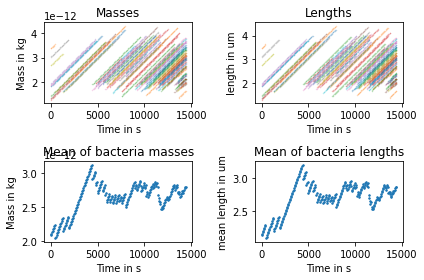

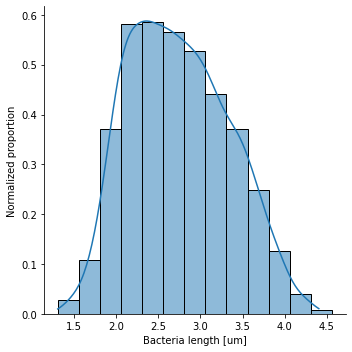

In [24]:
plot_sizes(data, info_file_path, time_step=constants.time_step, save_fig=False)
histo_length(data, info_file_path, save_fig=False)

This plot shows the behaviour of the bacterias lengths and masses in the simulation. We notice, that the cells masses and length increase proportional. This is because the bacterias width stays constants. Furthermore, we notice that the bacteria split at different lengths. The reason for this is, that the critical length of the bacteria is not fixed but depending on a propability drawn from a normal distribution.

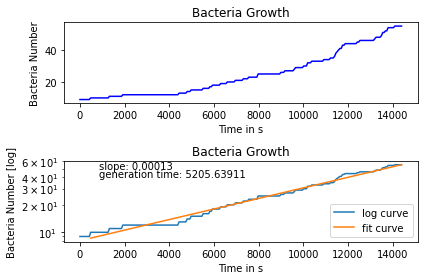

In [25]:
plot_num(data, info_file_path, time_step=constants.time_step, save_fig=False)

This plot shows the number of bacteria in the biofilm at different time steps. We start with above defined number of initial bacteria. Throughout the simulation the bacteria will split and hence the number of bacteria increases. For long simulation durations, the growth exhibits a expontential behaviour.

c:\users\david\anaconda3\envs\igem-biofilm-model\lib\site-packages\seaborn\distributions.py:1641: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


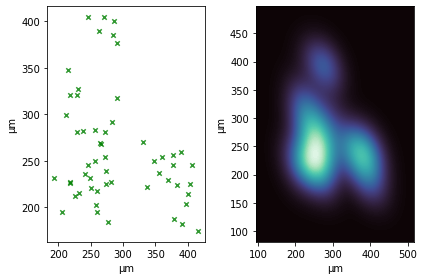

In [26]:
dens_map(data, info_file_path, save_fig=False)

The plot shows the position of the bacteria from a top view at the end of the simulation. We notice that most of the bacteria stay in the inital area, while only few bacteria move away. These few bacteria will be the origin of new bacteria clusters.

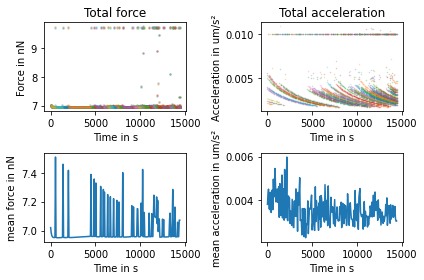

In [27]:
plot_force(data, info_file_path,time_step=constants.time_step, save_fig=False)

This plots show the acting forces on the bacteria during the simulation. We included a number of forces, which influence the movement of the bacteria inside the biofilm. Forces included are gravitaional force, drag force of the surronding medium as well as Van-der-Waals interaction between the bacteria and between the substrate and the bacteria. The order of magnitude of these acting forces is in the range of nano Newtons.

### Closing remarks
***
We hope, you could gain an insight on how to use our BiofilmSimulation python module. If you notice any issues or are having trouble getting the simulation running feel free to contact us by opening up a Git issue.
The above functionalities are only a part of the the functionalities we provide. Check our the documented source code for more information. We espaicily recommed to go through the plotting functions, the constants class as well the data handling functions. For an quick overview over the function, read the article at https://2020.igem.org/Team:Hannover/Software. There you will also find a schematic class diagram.
